<a href="https://colab.research.google.com/github/YuhaiW/00/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [59]:
# Check for GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [60]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda'if torch.cuda.is_available() else 'cpu'
device

1.13.1+cu116


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. like self_driving car
2. robotics vision (objecct detection, position detection)
3. face ID

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

When a machine learning model is overfitting, it means that it has learned the noise or random fluctuations in the training dataset, rather than the underlying pattern or relationship that exists between the features and the target variable. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. regularization (dropout on Neurl network)
2. use a different model 
3. reducce nosie data on the train dataset 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [61]:
import torchvision

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [62]:
from torchvision.transforms import ToTensor
train_data = torchvision.datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

In [63]:
#from torchvision.transforms import ToTensor
test_data = torchvision.datasets.MNIST(
    root="data", # where to download data to?
    train=False, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

image.shape is torch.Size([1, 28, 28])
image.squeezed shape is torch.Size([28, 28])


Text(0.5, 1.0, '5')

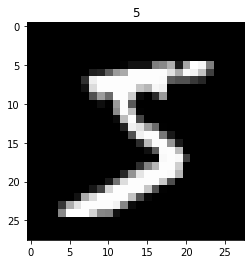

In [64]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image.shape is {image.shape}")
print(f"image.squeezed shape is {image.squeeze().shape}")
plt.imshow(image.squeeze(),'gray')
plt.title(label)

In [65]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

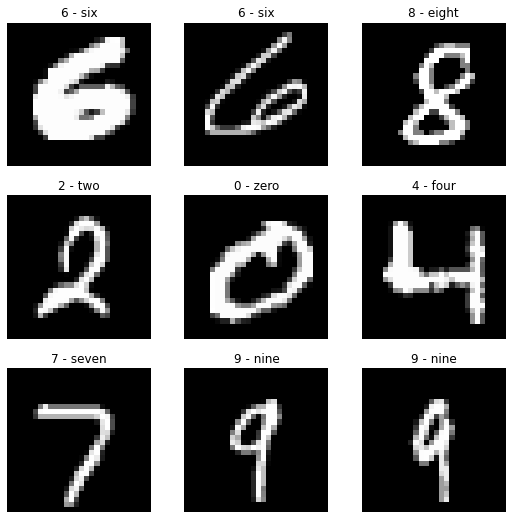

In [66]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [67]:
from torch.utils.data import DataLoader

In [68]:
BATCH_SIZE = 32
train_dl = DataLoader(dataset = train_data,
                      batch_size = BATCH_SIZE,
                      shuffle = True)
test_dl = DataLoader(dataset = test_data,
                     batch_size = BATCH_SIZE,
                     shuffle= False)
print(f"the length of the train_dl is {len(train_dl)}")

the length of the train_dl is 1875


In [69]:
train_features_batch, train_labels_batch = next(iter(train_dl))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


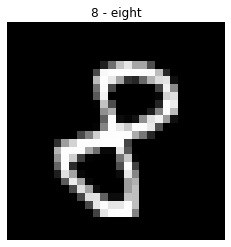

In [70]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [71]:
len(train_features_batch)

32

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [72]:
from torch.nn.modules.linear import Linear
from torch.nn.modules.container import Sequential
from torch.nn.modules.activation import ReLU
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_unit:int, output_shape:int):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3,# 28*28
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))# 14*14
    self.layer_stack2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))#7*7
    self.layer_stack3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_unit*7*7,
                  out_features = output_shape)
    )
  def forward(self,x):
    x = self.layer_stack1(x)
    #print(f"Output shape of conv block 1: {x.shape}")
    x = self.layer_stack2(x)
    #print(f"Output shape of conv block 2: {x.shape}")
    x = self.layer_stack3(x)
    #print(f"Output shape of conv block 3: {x.shape}")
    return x

    



In [73]:
model_1 = TinyVGG(input_shape = 1, hidden_unit=10, output_shape=10)
model_1

TinyVGG(
  (layer_stack1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_stack2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_stack3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [74]:
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
dummy_x.shape

torch.Size([1, 1, 28, 28])

In [75]:
model_1(dummy_x)

tensor([[-0.0401, -0.0118,  0.0433, -0.0539,  0.0845, -0.0179, -0.0511,  0.0170,
         -0.0910, -0.0202]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [76]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [77]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)


In [78]:
## Train Loop

In [79]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"_______this is the No.{epoch}_______")

  ### train

  train_loss = 0
  for batch, (X, y) in enumerate(train_dl):

    model_1.train()
    pred = model_1(X)

    loss = loss_fn(pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(train_dl)

  model_1.eval()
  test_loss = 0
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dl):
      X_test, y_test = X_test.to(device), y_test.to(device)
      pre_test = model_1(X_test)
      loss = loss_fn(pre_test, y_test)
      test_loss += loss
    test_loss /= len(test_dl)
  
  print(f"this is the No.{epoch} epoch, train_loss is {train_loss}, test_loss is {test_loss}")



  0%|          | 0/3 [00:00<?, ?it/s]

_______this is the No.0_______
this is the No.0 epoch, train_loss is 0.5176135897636414, test_loss is 0.07372797280550003
_______this is the No.1_______
this is the No.1 epoch, train_loss is 0.07790540158748627, test_loss is 0.05906372517347336
_______this is the No.2_______
this is the No.2 epoch, train_loss is 0.05959649011492729, test_loss is 0.050737421959638596


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [88]:
train_data[0][0]

5

In [103]:
acc = 0
for i in range(1000):
  #plt.imshow(test_data[i][0].squeeze())
  pred_label = model_1(test_data[i][0].unsqueeze(dim = 0).to(device))
  prob_pred_label = torch.softmax(pred_label, dim=1)
  pred_final = torch.argmax(prob_pred_label,dim = 1)
  if pred_final.item() == test_data[i][1]:
    acc = acc+1
    #print(1)
print(f"the accuracy is{(acc/1000)*100}%")

the accuracy is98.5%


4

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [104]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.6 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [105]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.21.0


In [106]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_1.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dl)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_1(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds) 
     

0it [00:00, ?it/s]

10000

In [107]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

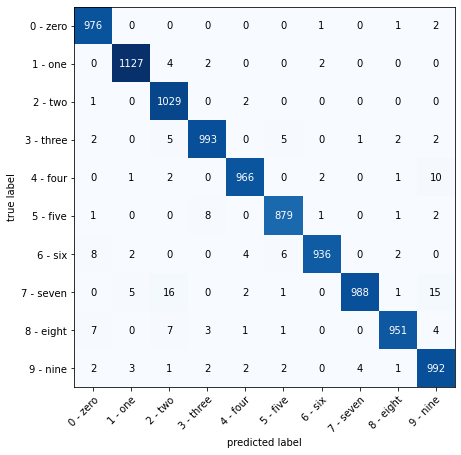

In [108]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)